# Text Analytics Group Assignment 1

Daxi Cheng, (fill your names here)

---
## Part A (basic text mining)
---

In [1]:
# Import statements for Part A
import warnings
warnings.filterwarnings('ignore')
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import nltk
from nltk.corpus import wordnet
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as ss
import matplotlib

from nltk.stem import WordNetLemmatizer
import re
#nltk.download('wordnet')

# Import statements for Part B
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report

import os
import random
from operator import itemgetter
import csv



Populating the interactive namespace from numpy and matplotlib


/Users/Jack/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?

In [270]:
# Read the file and take a subset
data=pd.read_csv('Train_rev1.csv')
random.seed(1)
train_data=data.sample(10000)

In [284]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
def token(s):
    decode=s.decode('utf-8').strip()
    token=tokenizer.tokenize(decode)
    return token
train_data['token']=train_data['FullDescription'].map(token)

In [285]:
def pos(s):
    poslist=[]
    pos=nltk.pos_tag(s)
    for i in pos:
        poslist.append(i[1])
    return poslist
train_data['pos']=train_data['token'].map(pos)

In [286]:
import itertools
word_list = list(itertools.chain(*train_data['token'].tolist()))
lower_list = []
#switch all of them to a lower case and make a list
for word in word_list:
    lower_list.append(word.lower())
pos_list = list(itertools.chain(*train_data['pos'].tolist()))

In [287]:
word_count=Counter(word_list)
pos_count=Counter(pos_list)
pos_rank=sorted(pos_count.items(),key=lambda x:x[1],reverse=True)
pos_rank[:5]

[('NN', 446721),
 ('NNP', 359129),
 ('IN', 259085),
 ('JJ', 208243),
 ('DT', 199867)]

### A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.

In [288]:
# Get the top 100 most frequent words
word_freq = Counter(lower_list)
top_100=sorted(word_freq.items(),key=lambda x:x[1],reverse=True)[:100]


In [289]:
rank_freq=[]    
for i in top_100:
    rank_freq.append(i[1]) 

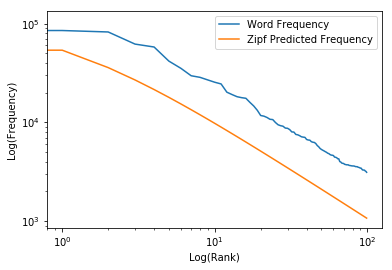

In [290]:
# Get values for expected frequency of top 100 words using Zipf's Law
counter=1
zipf=[]
max_freq = top_100[0][1]
while len(zipf) < 100:
    zipf.append(max_freq*1.000/counter)
    counter += 1

# Plot actual frequencies and Zipf frequencies

plt.plot(rank_freq, label = 'Word Frequency')
plt.plot(zipf, label = 'Zipf Predicted Frequency') 
plt.xscale('log')
plt.yscale('log')
legend(loc='best')
xlabel('Log(Rank)')
ylabel('Log(Frequency)')

### A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is their frequency?

In [291]:
from nltk.corpus import stopwords
nostop = [word for word in lower_list if word not in stopwords.words('english')]

lmtzr = WordNetLemmatizer()
nostoplmtzed = [lmtzr.lemmatize(word) for word in nostop]

In [292]:
pd.Series(nostoplmtzed).value_counts()[:10]

experience    17662
role          12561
team          12083
work          12073
client        11722
business      11074
service       10119
skill          9715
working        9158
within         8714
dtype: int64